In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Useful functions
def SaveFig(filename):
    plt.savefig(r'fig/'+filename)

In [2]:
# American Call Option Valuation Using Black-Scholes
def VCall(S,mu,sigma,K,T):
    d1 = (np.log(S/K) + (mu + 1/2 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    C = S * norm.cdf(d1) - K * norm.cdf(d2) * np.exp(-1 * mu * T)
    return C

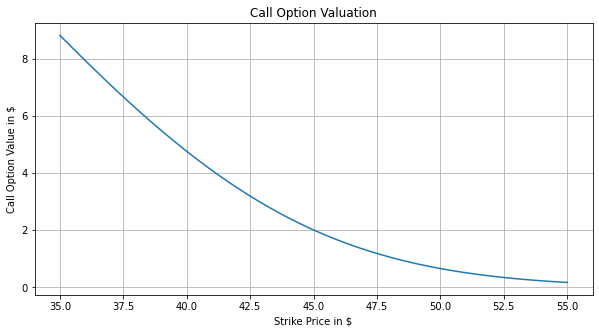

In [3]:
# Effect of strike price
S     = 42
mu    = 0.1
sigma = 0.2
T     = 0.5 # 6 months

C = pd.DataFrame(columns=['Strike_Price','Call_Value'])

for i,K in enumerate(np.linspace(35,55,100)):
    C = C.append({'Strike_Price':K, 'Call_Value':VCall(S,mu,sigma,K,T)}, ignore_index=True)
    
plt.figure(figsize = (10, 5))
plt.plot(C['Strike_Price'], C['Call_Value'])
plt.xlabel('Strike Price in $')
plt.ylabel('Call Option Value in $')
plt.title('Call Option Valuation')
plt.grid()
SaveFig('StrikePrice-Effect-BS')
plt.show()

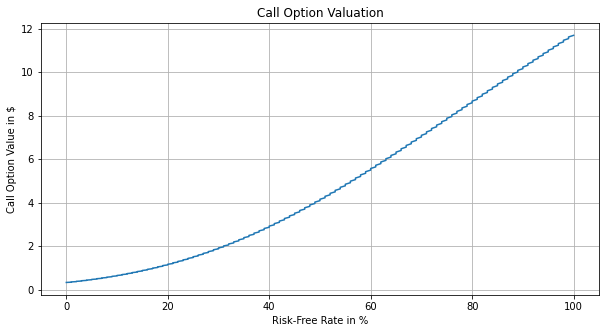

In [4]:
# Effect of risk-free rate
S     = 42
K     = 50
sigma = 0.2
T     = 0.5 # 6 months

C = pd.DataFrame(columns=['mu','Call_Value'])

for i,mu in enumerate(np.linspace(0,1,200)):
    C = C.append({'mu':np.round(mu,2)*100, 'Call_Value':VCall(S,mu,sigma,K,T)}, ignore_index=True)
    
plt.figure(figsize = (10, 5))
plt.plot(C['mu'], C['Call_Value'])
plt.xlabel('Risk-Free Rate in %')
plt.ylabel('Call Option Value in $')
plt.title('Call Option Valuation')
plt.grid()
SaveFig('RiskFreeRate-Effect-BS')
plt.show()

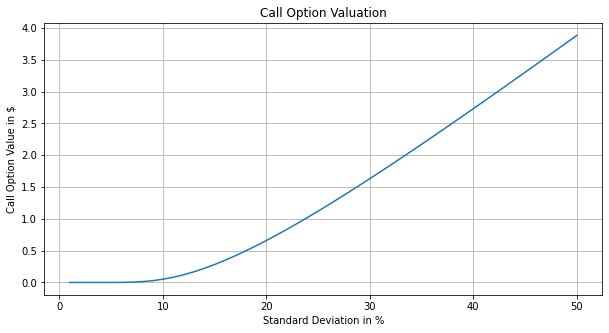

In [5]:
# Effect of standard deviation
S     = 42
K     = 50
mu    = 0.1
T     = 0.5 # 6 months

C = pd.DataFrame(columns=['sigma','Call_Value'])

for i,sigma in enumerate(np.linspace(0.01,0.5,100)):
    sigma = np.round(sigma,2)
    C = C.append({'sigma':sigma*100, 'Call_Value':VCall(S,mu,sigma,K,T)}, ignore_index=True)
    
plt.figure(figsize = (10, 5))
plt.plot(C['sigma'], C['Call_Value'])
plt.xlabel('Standard Deviation in %')
plt.ylabel('Call Option Value in $')
plt.title('Call Option Valuation')
plt.grid()
SaveFig('Volatility-Effect-BS')
plt.show()

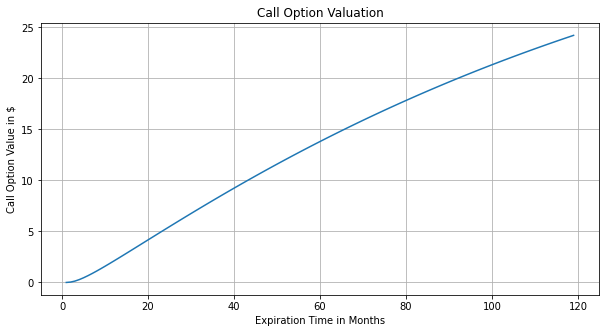

In [10]:
# Effect of expiration time
S     = 42
K     = 50
sigma = 0.2
mu    = 0.1

C = pd.DataFrame(columns=['T','Call_Value'])

for i in range(1,120):
    T = i/12
    C = C.append({'T':i, 'Call_Value':VCall(S,mu,sigma,K,T)}, ignore_index=True)
    
plt.figure(figsize = (10, 5))
plt.plot(C['T'], C['Call_Value'])
plt.xlabel('Expiration Time in Months')
plt.ylabel('Call Option Value in $')
plt.title('Call Option Valuation')
plt.grid()
SaveFig('Expiration-Effect-BS')
plt.show()

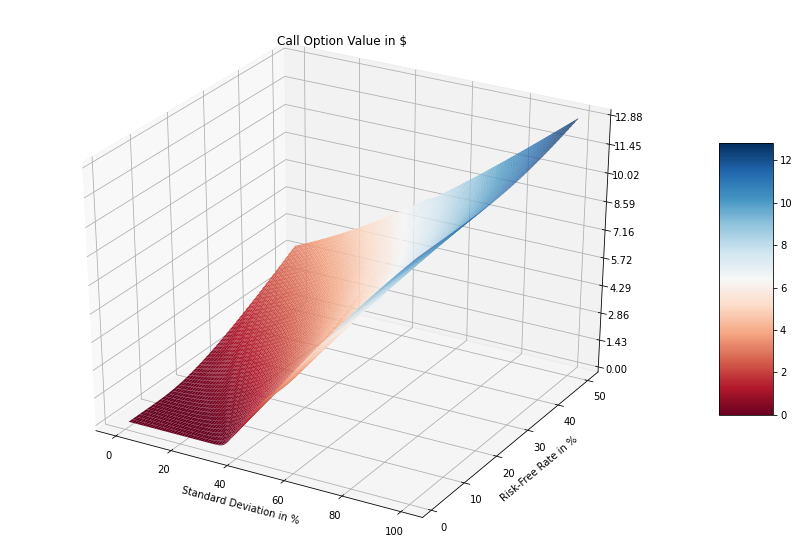

In [32]:
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Effect of risk-free rate and standard deviation
S     = 42
K     = 50
T     = 0.5 # In years
                    
mu = np.linspace(0,1,100)
sigma = np.linspace(0.01,0.5,100)
X,Y = meshgrid(mu, sigma)
Z = VCall(S,X,Y,K,T)
        
fig  = plt.figure(figsize = (15, 10))
ax   = fig.gca(projection='3d')
surf = ax.plot_surface(np.round(X,2) * 100, np.round(Y,2) * 100, Z,
                       rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=True)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('Standard Deviation in %')
plt.ylabel('Risk-Free Rate in %')
plt.title('Call Option Value in $')

SaveFig('r-sigma-Effect-BS')
plt.show()